# <font color='red'> Data visualization assignment 1 </font> 
### <font color='blue'>Task:</font>
Create code and report showing production testing data (Testing data can be created artificially).
 
            1. "Golden" reference data will be created. which is then used to create PASS/FAIL limits for production testers data.  
            2. Tester data at least for 5 testers will be created. At least 2000 data points for each tester.  

Testers are different so that,

            one has large variation in the data,
            one has systematic error,       
            one is drifting over time and       
            Two are working fine.       

Visualize production testing data so that in the report,<li> <b> "golden" data is shown as timeline and histogram plots as well as all testers data. </b> </li> <li> <b> Plots should show chosen PASS/FAIL limits (one sigma for example).</b> </li> <li> <b>Visualize FAIL data-points.</b> </li>
Return Notebook of the code and corresponding files. Data report can be in HTML-format maintaining interactivity or it can be in other format having interactivity (zooming and panning is possible)

In [1]:
#import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mplcursors
import mpld3
from itertools import cycle

In [2]:
# Let's artificially generate antenna production testing data.
center_value = 1575     #GPS antenna frequency
n_measurements = 2000   # Number of measurements
r_factor = 0.09         # Random Factor

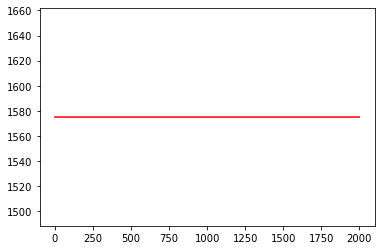

In [3]:
# Generate ideal senario of test measurement
ideal = np.ones(n_measurements) * center_value
plt.plot(ideal, color = 'r')
plt.show()



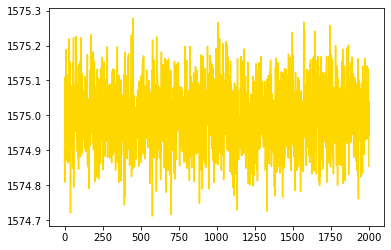

In [4]:
# create golden measurement data
machine_golden  = center_value + r_factor * np.random.standard_normal(n_measurements)

plt.plot(machine_golden, color = '#FFD700')
plt.show()

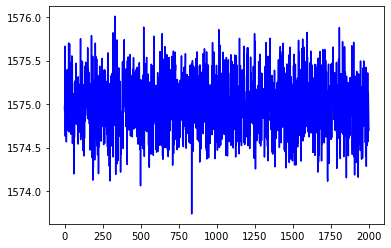

In [5]:
# tester 1 measurement data has large variation with noise and noisy offset
offset_1 = -2
offset_factor_1 = 0.15
r_factor_1 = 0.07

machine_1 = center_value + r_factor_1 * np.random.standard_normal(n_measurements) + offset_1 * offset_factor_1 * np.random.standard_normal(n_measurements)
plt.plot(machine_1, color = 'b')
plt.show()

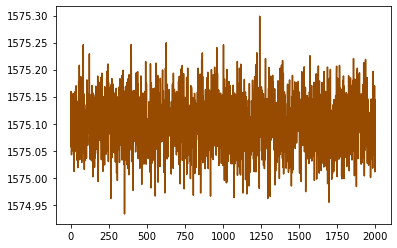

In [6]:
# tester 2 measurement data content systemetic error
offset_2 = 0.1
r_factor_2 = 0.05

machine_2 = center_value + r_factor_2 * np.random.standard_normal(n_measurements) + offset_2

plt.plot(machine_2, color = '#964B00') 
plt.show()

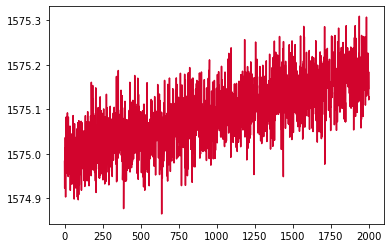

In [7]:
# tester 3 measurement data drifting over time
offset_3 = np.arange(0, 0.00009 * n_measurements, 0.00009)
r_factor_3 = 0.05
machine_3 = center_value + r_factor_3 * np.random.standard_normal(n_measurements)
machine_3 = machine_3 + offset_3
plt.plot(machine_3, color = '#D2042D')
plt.show()

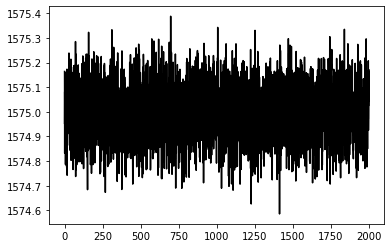

In [8]:
# #Tester 4, 5 measurement data quite normal
r_factor_4 = 0.11
machine_4 = center_value + r_factor_4 * np.random.standard_normal(n_measurements)
machine_5 = center_value + r_factor_4 * np.random.standard_normal(n_measurements)
plt.plot(machine_4, color = '#000000')
plt.plot(machine_5, color = '#000000')
plt.show()

In [9]:
# make a dataframe consist of all signals
df = pd.DataFrame()
index = range(0,len(machine_golden))
df['index'] = index
df['ideal'] = ideal
df['golden'] = machine_golden
df['machine_1'] = machine_1
df['machine_2'] = machine_2
df['machine_3'] = machine_3
df['machine_4'] = machine_4
df['machine_5'] = machine_5
df = df.set_index(['index'])
df.head()


,ideal,golden,machine_1,machine_2,machine_3,machine_4,machine_5
index,,,,,,,
0,1575.0,1574.865087,1574.973973,1575.057774,1574.982985,1575.163967,1574.953547
1,1575.0,1574.902170,1574.918970,1575.159381,1574.923073,1574.832345,1575.081135
2,1575.0,1575.108389,1575.253573,1575.081736,1575.012876,1575.087331,1574.986923
3,1575.0,1575.050552,1575.665255,1575.158040,1574.978702,1574.989860,1574.880612
4,1575.0,1574.808278,1574.744582,1575.042517,1574.971874,1575.025329,1574.888707


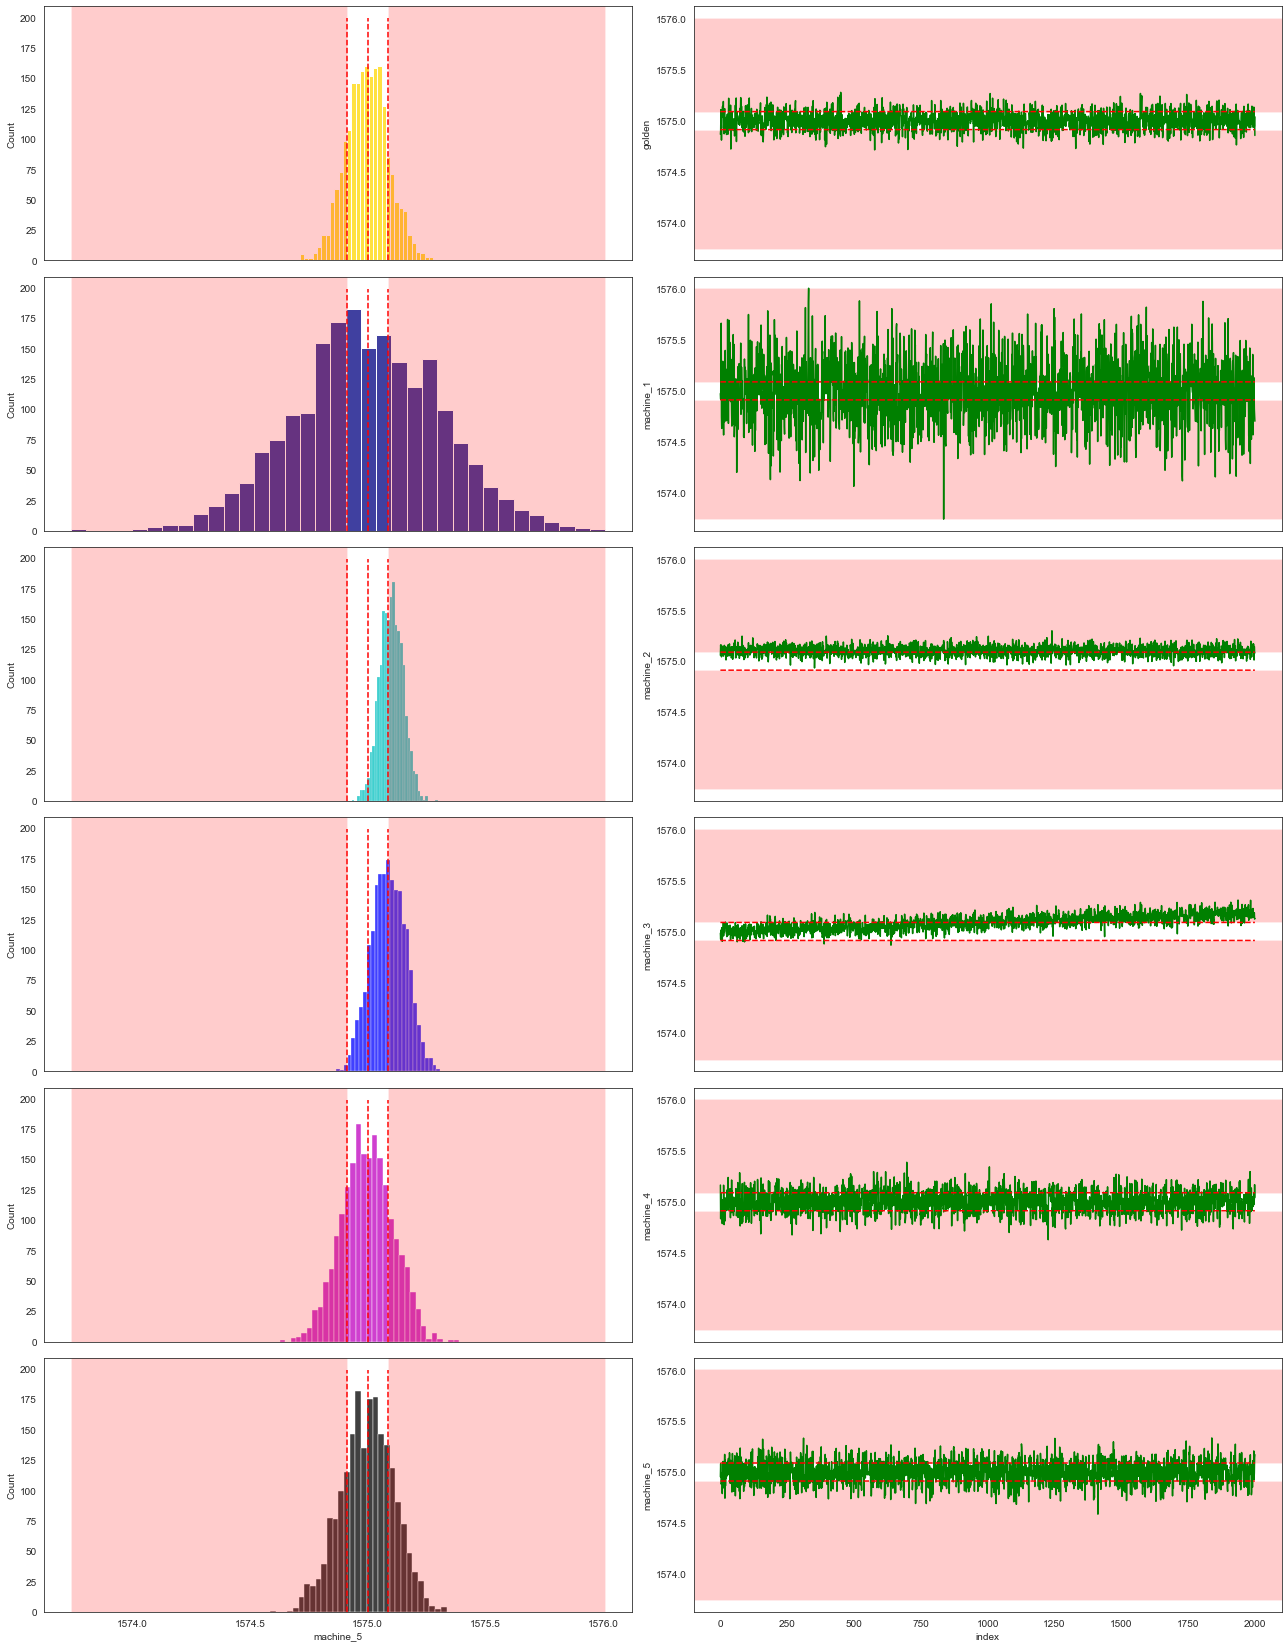

In [10]:
#set pass fail limit to one SD
s_dev = np.std(df["golden"]) #set pass fail limit from "golden data" considering standard deviation, one-sigma rule, 68% rule --> 68% yield
upper_threshold = center_value + s_dev
lower_threshold = center_value - s_dev

cycol = cycle(['#FFD700', 'navy', 'c', 'b', 'm', 'k'])
sns.set_style("white")
%matplotlib

#create figure and subplots
fig, axs = plt.subplots(6,2, figsize = (18,23),sharex = 'col')

# plot golden signal
graph = sns.histplot(df["golden"], ax = axs[0, 0], color = next(cycol))

# visualize golden signal fail datapoints
axs[0,0].axvspan(upper_threshold,max(machine_1), 0, n_measurements, facecolor='red', alpha=0.2)
axs[0,0].axvspan(lower_threshold,min(machine_1), 0, n_measurements, facecolor='red', alpha=0.2)

# plot center value and pass/fail limit for golden signal
axs[0,0].plot([center_value]*200, np.arange(200), 'r--', label='center_value')
axs[0,0].plot([upper_threshold]*200, np.arange(200), 'r--', label='upper_threshold')
axs[0,0].plot([lower_threshold]*200, np.arange(200), 'r--', label='lower_threshold')

# plot golden signal timeline
graph = sns.lineplot(data = df, y = "golden", x = 'index', ax = axs[0, 1], color = 'g')

# visualize golden signal timeline fail datapoints
axs[0,1].axhspan(upper_threshold,max(machine_1), 0, n_measurements, facecolor='red', alpha=0.2)
axs[0,1].axhspan(lower_threshold,min(machine_1), 0, n_measurements, facecolor='red', alpha=0.2)

# plot fail limit for golden signal
axs[0,1].plot(np.arange(n_measurements), [upper_threshold]*n_measurements, 'r--', label='upper_threshold')
axs[0,1].plot(np.arange(n_measurements), [lower_threshold]*n_measurements, 'r--', label='lower_threshold')

for i in range(1,6):
    # plot rest of all signals
    graph = sns.histplot(df["machine_"+str(i)], ax = axs[i, 0], color = next(cycol))
    
    # visualize signals fail datapoints
    axs[i,0].axvspan(upper_threshold,max(machine_1), 0, n_measurements, facecolor='red', alpha=0.2)
    axs[i,0].axvspan(lower_threshold,min(machine_1), 0, n_measurements, facecolor='red', alpha=0.2)
    
    # plot center value and pass/fail limit for signals
    axs[i,0].plot([center_value]*200, np.arange(200), 'r--', label='center_value')
    axs[i,0].plot([upper_threshold]*200, np.arange(200), 'r--', label='upper_threshold')
    axs[i,0].plot([lower_threshold]*200, np.arange(200), 'r--', label='lower_threshold')
    
    # plot rest of all signals timeline
    graph = sns.lineplot(data = df, y = "machine_"+str(i), x = 'index', ax = axs[i, 1], color = 'g')

    # visualize signals timeline fail datapoints
    axs[i,1].axhspan(upper_threshold,max(machine_1), 0, n_measurements, facecolor='red', alpha=0.2)
    axs[i,1].axhspan(lower_threshold,min(machine_1), 0, n_measurements, facecolor='red', alpha=0.2)

    # plot fail limit for signals
    axs[i,1].plot(np.arange(n_measurements), [upper_threshold]*n_measurements, 'r--', label='upper_threshold')
    axs[i,1].plot(np.arange(n_measurements), [lower_threshold]*n_measurements, 'r--', label='lower_threshold')

# add cursor functionality to a Matplotlib figure. This allows users to hover over data points in the plot and see their coordinates 
# and other information, providing an interactive way to explore the data.
cursor = mplcursors.cursor(fig)

plt.tight_layout()
plt.show()

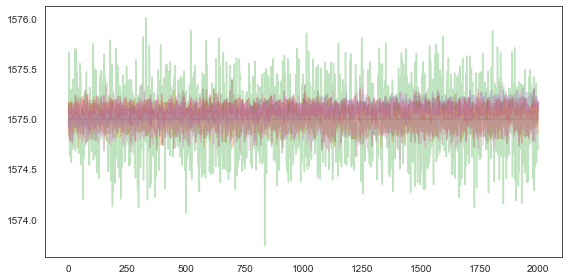

In [11]:

# plot all the signals in one figure
fig2, ax8 = plt.subplots(figsize = (8,4))
ax8.plot(df['ideal'], alpha = 0.3)
ax8.plot(df['golden'], alpha = 0.3)
ax8.plot(df['machine_1'], alpha = 0.3)
ax8.plot(df['machine_2'], alpha = 0.3)
ax8.plot(df['machine_3'], alpha = 0.3)
ax8.plot(df['machine_4'], alpha = 0.3)
ax8.plot(df['machine_5'], alpha = 0.3)
cursor = mplcursors.cursor(fig2)
plt.tight_layout()
plt.show()


In [12]:
# convert figures to HTML
html1 = mpld3.fig_to_html(fig)
html2 = mpld3.fig_to_html(fig2)
combined_html = html2 + html1
plt.show()
#save html file 
f = open('test.html','w')
f.write(combined_html)
f.close()

### <font color='B'>You can see the interactive figure in below html link </font>
#### <a> <font color='blue'>https://testing-data-plot.tiiny.site/ </font> </a>